# Analyse Quantitative Matrix to find Proteins behaving similarly

Get/Load Packages and Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

Load data and inspect data

In [2]:
df=pd.read_excel("WF305900_matrix.xlsx")
df.head()

,Peptide,Protein,Intensity_PP_S1701_078_scored.txt_0_0,RT_PP_S1701_078_scored.txt_0_0,score_PP_S1701_078_scored.txt_0_0,Intensity_PP_S1701_083_scored.txt_0_1,RT_PP_S1701_083_scored.txt_0_1,score_PP_S1701_083_scored.txt_0_1,Intensity_PP_S1701_056_scored.txt_0_2,RT_PP_S1701_056_scored.txt_0_2,...,score_PP_S1701_093_scored.txt_0_61,Intensity_PP_S1701_092_scored.txt_0_62,RT_PP_S1701_092_scored.txt_0_62,score_PP_S1701_092_scored.txt_0_62,Intensity_PP_S1701_040_scored.txt_0_63,RT_PP_S1701_040_scored.txt_0_63,score_PP_S1701_040_scored.txt_0_63,RT_mean,RT_std,pg_pvalue
0,10001_IVEEFGVAHISTGDMFR_3_run0,1/ddb036463082,1.649540e+07,3974.205172,0.000518,2.017560e+07,3973.313993,0.000518,3.149140e+07,3979.190888,...,0.000252,1.602520e+07,3987.816591,0.000762,3.428320e+07,3982.304096,0.000518,3979.333530,9.040971,0.000000e+00
1,10002_IVEQDEFENGLR_2_run0,1/ddb036867947,5.228145e+05,2939.383746,2.000000,4.147761e+05,2941.781908,2.000000,6.645500e+05,2958.501773,...,0.003228,6.195382e+05,2959.134879,2.000000,3.013999e+05,2956.363593,2.000000,2946.817040,11.620979,3.343283e-82
2,10003_IVESDQFK_2_run0,1/ddb037180991,1.227250e+05,1995.969444,2.000000,1.081180e+05,1996.029401,0.009832,1.542379e+05,2011.177765,...,2.000000,1.225470e+05,2017.200342,0.002917,8.348850e+04,2018.637268,2.000000,2003.745213,14.299655,2.571941e-10
3,10004_IVFAPLKDLVK_2_run0,1/ddb036869476,7.128100e+05,3723.853716,0.000842,1.553990e+06,3724.003768,0.002419,1.996890e+06,3730.766441,...,0.002632,1.303410e+06,3740.748895,0.000832,5.113970e+05,3733.413559,0.001358,3729.165424,10.268166,9.781809e-233
4,10005_IVFAPLKDLVK_3_run0,1/ddb036869476,3.772130e+06,3724.020797,0.000753,1.649680e+07,3723.571066,0.000577,1.969040e+07,3731.464379,...,0.000762,5.903550e+06,3740.482224,0.000749,6.293110e+06,3733.179798,0.000762,3729.582599,10.230642,0.000000e+00


There are Peptide,Protein,scores, RTs and Intensities per precursor, I am interested in intensities column
so just creating a dataframe with only the Intensities column .It had 12655X197 and after removing the other columns we now have (12655X64)matrix =809920 data points

In [3]:
df=df[['Peptide','Protein','Intensity_PP_S1701_078_scored.txt_0_0',
       'Intensity_PP_S1701_083_scored.txt_0_1',
       'Intensity_PP_S1701_056_scored.txt_0_2',
       'Intensity_PP_S1701_038_scored.txt_0_3',
       'Intensity_PP_S1701_074_scored.txt_0_4',
       'Intensity_PP_S1701_046_scored.txt_0_5',
       'Intensity_PP_S1701_077_scored.txt_0_6',
       'Intensity_PP_S1701_063_scored.txt_0_7',
       'Intensity_PP_S1701_089_scored.txt_0_8',
       'Intensity_PP_S1701_098_scored.txt_0_9',
       'Intensity_PP_S1701_072_scored.txt_0_10',
       'Intensity_PP_S1701_075_scored.txt_0_11',
       'Intensity_PP_S1701_042_scored.txt_0_12',
       'Intensity_PP_S1701_039_scored.txt_0_13',
       'Intensity_PP_S1701_088_scored.txt_0_14',
       'Intensity_PP_S1701_084_scored.txt_0_15',
       'Intensity_PP_S1701_043_scored.txt_0_16',
       'Intensity_PP_S1701_065_scored.txt_0_17',
       'Intensity_PP_S1701_096_scored.txt_0_18',
       'Intensity_PP_S1701_051_scored.txt_0_19',
       'Intensity_PP_S1701_070_scored.txt_0_20',
       'Intensity_PP_S1701_045_scored.txt_0_21',
       'Intensity_PP_S1701_035_scored.txt_0_22',
       'Intensity_PP_S1701_049_scored.txt_0_23',
       'Intensity_PP_S1701_082_scored.txt_0_24',
       'Intensity_PP_S1701_068_scored.txt_0_25',
       'Intensity_PP_S1701_100_scored.txt_0_26',
       'Intensity_PP_S1701_067_scored.txt_0_27',
       'Intensity_PP_S1701_073_scored.txt_0_28',
       'Intensity_PP_S1701_061_scored.txt_0_29',
       'Intensity_PP_S1701_091_scored.txt_0_30',
       'Intensity_PP_S1701_066_scored.txt_0_31',
       'Intensity_PP_S1701_041_scored.txt_0_32',
       'Intensity_PP_S1701_053_scored.txt_0_33',
       'Intensity_PP_S1701_079_scored.txt_0_34',
       'Intensity_PP_S1701_057_scored.txt_0_35',
       'Intensity_PP_S1701_090_scored.txt_0_36',
       'Intensity_PP_S1701_101_scored.txt_0_37',
       'Intensity_PP_S1701_044_scored.txt_0_38',
       'Intensity_PP_S1701_087_scored.txt_0_39',
       'Intensity_PP_S1701_095_scored.txt_0_40',
       'Intensity_PP_S1701_037_scored.txt_0_41',
       'Intensity_PP_S1701_080_scored.txt_0_42',
       'Intensity_PP_S1701_064_scored.txt_0_43',
       'Intensity_PP_S1701_054_scored.txt_0_44',
       'Intensity_PP_S1701_058_scored.txt_0_45',
       'Intensity_PP_S1701_071_scored.txt_0_46',
       'Intensity_PP_S1701_036_scored.txt_0_47',
       'Intensity_PP_S1701_062_scored.txt_0_48',
       'Intensity_PP_S1701_060_scored.txt_0_49',
       'Intensity_PP_S1701_052_scored.txt_0_50',
       'Intensity_PP_S1701_081_scored.txt_0_51',
       'Intensity_PP_S1701_048_scored.txt_0_52',
       'Intensity_PP_S1701_094_scored.txt_0_53',
       'Intensity_PP_S1701_069_scored.txt_0_54',
       'Intensity_PP_S1701_085_scored.txt_0_55',
       'Intensity_PP_S1701_047_scored.txt_0_56',
       'Intensity_PP_S1701_050_scored.txt_0_57',
       'Intensity_PP_S1701_059_scored.txt_0_58',
       'Intensity_PP_S1701_086_scored.txt_0_59',
       'Intensity_PP_S1701_099_scored.txt_0_60',
       'Intensity_PP_S1701_093_scored.txt_0_61',
       'Intensity_PP_S1701_092_scored.txt_0_62',
       'Intensity_PP_S1701_040_scored.txt_0_63']]


In [4]:
df.head()

,Peptide,Protein,Intensity_PP_S1701_078_scored.txt_0_0,Intensity_PP_S1701_083_scored.txt_0_1,Intensity_PP_S1701_056_scored.txt_0_2,Intensity_PP_S1701_038_scored.txt_0_3,Intensity_PP_S1701_074_scored.txt_0_4,Intensity_PP_S1701_046_scored.txt_0_5,Intensity_PP_S1701_077_scored.txt_0_6,Intensity_PP_S1701_063_scored.txt_0_7,...,Intensity_PP_S1701_069_scored.txt_0_54,Intensity_PP_S1701_085_scored.txt_0_55,Intensity_PP_S1701_047_scored.txt_0_56,Intensity_PP_S1701_050_scored.txt_0_57,Intensity_PP_S1701_059_scored.txt_0_58,Intensity_PP_S1701_086_scored.txt_0_59,Intensity_PP_S1701_099_scored.txt_0_60,Intensity_PP_S1701_093_scored.txt_0_61,Intensity_PP_S1701_092_scored.txt_0_62,Intensity_PP_S1701_040_scored.txt_0_63
0,10001_IVEEFGVAHISTGDMFR_3_run0,1/ddb036463082,1.649540e+07,2.017560e+07,3.149140e+07,2.661300e+07,22042900.0,5.817910e+07,2.079080e+07,2.888600e+07,...,3.062350e+07,1.727750e+07,4.730720e+07,3.497760e+07,4.103980e+07,1.580870e+07,1.290010e+07,1.892480e+07,1.602520e+07,3.428320e+07
1,10002_IVEQDEFENGLR_2_run0,1/ddb036867947,5.228145e+05,4.147761e+05,6.645500e+05,3.566880e+05,676306.0,5.783130e+05,8.038343e+05,3.472775e+05,...,8.328750e+05,1.352174e+06,4.771577e+05,1.075516e+06,7.638536e+05,5.812870e+05,2.333600e+05,1.474280e+06,6.195382e+05,3.013999e+05
2,10003_IVESDQFK_2_run0,1/ddb037180991,1.227250e+05,1.081180e+05,1.542379e+05,7.539249e+04,99812.7,8.774520e+04,1.599285e+05,1.043466e+05,...,7.061029e+02,1.083961e+05,1.452623e+05,1.201309e+05,1.311774e+05,8.392261e+04,3.062509e+04,2.568628e+05,1.225470e+05,8.348850e+04
3,10004_IVFAPLKDLVK_2_run0,1/ddb036869476,7.128100e+05,1.553990e+06,1.996890e+06,4.616070e+05,2424650.0,2.417660e+06,3.400570e+06,2.301700e+06,...,2.817860e+06,3.933090e+06,1.148280e+06,3.988670e+06,2.002270e+06,1.445580e+06,8.768580e+05,2.754260e+06,1.303410e+06,5.113970e+05
4,10005_IVFAPLKDLVK_3_run0,1/ddb036869476,3.772130e+06,1.649680e+07,1.969040e+07,5.371200e+06,10043900.0,3.087840e+07,1.230000e+07,3.795080e+07,...,4.306510e+07,1.024390e+07,1.270630e+07,3.184560e+07,2.024600e+07,1.305140e+07,6.371920e+06,4.251900e+06,5.903550e+06,6.293110e+06


Clean up run IDs

In [5]:
df.columns = df.columns.str.replace('Intensity_', '')
df.columns = df.columns.str.replace('scored.txt_0_', '')
df.head()

,Peptide,Protein,PP_S1701_078_0,PP_S1701_083_1,PP_S1701_056_2,PP_S1701_038_3,PP_S1701_074_4,PP_S1701_046_5,PP_S1701_077_6,PP_S1701_063_7,...,PP_S1701_069_54,PP_S1701_085_55,PP_S1701_047_56,PP_S1701_050_57,PP_S1701_059_58,PP_S1701_086_59,PP_S1701_099_60,PP_S1701_093_61,PP_S1701_092_62,PP_S1701_040_63
0,10001_IVEEFGVAHISTGDMFR_3_run0,1/ddb036463082,1.649540e+07,2.017560e+07,3.149140e+07,2.661300e+07,22042900.0,5.817910e+07,2.079080e+07,2.888600e+07,...,3.062350e+07,1.727750e+07,4.730720e+07,3.497760e+07,4.103980e+07,1.580870e+07,1.290010e+07,1.892480e+07,1.602520e+07,3.428320e+07
1,10002_IVEQDEFENGLR_2_run0,1/ddb036867947,5.228145e+05,4.147761e+05,6.645500e+05,3.566880e+05,676306.0,5.783130e+05,8.038343e+05,3.472775e+05,...,8.328750e+05,1.352174e+06,4.771577e+05,1.075516e+06,7.638536e+05,5.812870e+05,2.333600e+05,1.474280e+06,6.195382e+05,3.013999e+05
2,10003_IVESDQFK_2_run0,1/ddb037180991,1.227250e+05,1.081180e+05,1.542379e+05,7.539249e+04,99812.7,8.774520e+04,1.599285e+05,1.043466e+05,...,7.061029e+02,1.083961e+05,1.452623e+05,1.201309e+05,1.311774e+05,8.392261e+04,3.062509e+04,2.568628e+05,1.225470e+05,8.348850e+04
3,10004_IVFAPLKDLVK_2_run0,1/ddb036869476,7.128100e+05,1.553990e+06,1.996890e+06,4.616070e+05,2424650.0,2.417660e+06,3.400570e+06,2.301700e+06,...,2.817860e+06,3.933090e+06,1.148280e+06,3.988670e+06,2.002270e+06,1.445580e+06,8.768580e+05,2.754260e+06,1.303410e+06,5.113970e+05
4,10005_IVFAPLKDLVK_3_run0,1/ddb036869476,3.772130e+06,1.649680e+07,1.969040e+07,5.371200e+06,10043900.0,3.087840e+07,1.230000e+07,3.795080e+07,...,4.306510e+07,1.024390e+07,1.270630e+07,3.184560e+07,2.024600e+07,1.305140e+07,6.371920e+06,4.251900e+06,5.903550e+06,6.293110e+06


In [6]:
list(df.columns)

['Peptide',
 'Protein',
 'PP_S1701_078_0',
 'PP_S1701_083_1',
 'PP_S1701_056_2',
 'PP_S1701_038_3',
 'PP_S1701_074_4',
 'PP_S1701_046_5',
 'PP_S1701_077_6',
 'PP_S1701_063_7',
 'PP_S1701_089_8',
 'PP_S1701_098_9',
 'PP_S1701_072_10',
 'PP_S1701_075_11',
 'PP_S1701_042_12',
 'PP_S1701_039_13',
 'PP_S1701_088_14',
 'PP_S1701_084_15',
 'PP_S1701_043_16',
 'PP_S1701_065_17',
 'PP_S1701_096_18',
 'PP_S1701_051_19',
 'PP_S1701_070_20',
 'PP_S1701_045_21',
 'PP_S1701_035_22',
 'PP_S1701_049_23',
 'PP_S1701_082_24',
 'PP_S1701_068_25',
 'PP_S1701_100_26',
 'PP_S1701_067_27',
 'PP_S1701_073_28',
 'PP_S1701_061_29',
 'PP_S1701_091_30',
 'PP_S1701_066_31',
 'PP_S1701_041_32',
 'PP_S1701_053_33',
 'PP_S1701_079_34',
 'PP_S1701_057_35',
 'PP_S1701_090_36',
 'PP_S1701_101_37',
 'PP_S1701_044_38',
 'PP_S1701_087_39',
 'PP_S1701_095_40',
 'PP_S1701_037_41',
 'PP_S1701_080_42',
 'PP_S1701_064_43',
 'PP_S1701_054_44',
 'PP_S1701_058_45',
 'PP_S1701_071_46',
 'PP_S1701_036_47',
 'PP_S1701_062_48',
 'PP_S

Check intensity sums and distributions - are there outliers to be treated with care/removed?
The df of Intensity sums per run is plotted to see the INTENSITY DISTRIBUTIONS
So dropping Peptide and Protein Column too in our "data" and retaining only Intensities column

In [7]:
df=df[['PP_S1701_078_0',
 'PP_S1701_083_1',
 'PP_S1701_056_2',
 'PP_S1701_038_3',
 'PP_S1701_074_4',
 'PP_S1701_046_5',
 'PP_S1701_077_6',
 'PP_S1701_063_7',
 'PP_S1701_089_8',
 'PP_S1701_098_9',
 'PP_S1701_072_10',
 'PP_S1701_075_11',
 'PP_S1701_042_12',
 'PP_S1701_039_13',
 'PP_S1701_088_14',
 'PP_S1701_084_15',
 'PP_S1701_043_16',
 'PP_S1701_065_17',
 'PP_S1701_096_18',
 'PP_S1701_051_19',
 'PP_S1701_070_20',
 'PP_S1701_045_21',
 'PP_S1701_035_22',
 'PP_S1701_049_23',
 'PP_S1701_082_24',
 'PP_S1701_068_25',
 'PP_S1701_100_26',
 'PP_S1701_067_27',
 'PP_S1701_073_28',
 'PP_S1701_061_29',
 'PP_S1701_091_30',
 'PP_S1701_066_31',
 'PP_S1701_041_32',
 'PP_S1701_053_33',
 'PP_S1701_079_34',
 'PP_S1701_057_35',
 'PP_S1701_090_36',
 'PP_S1701_101_37',
 'PP_S1701_044_38',
 'PP_S1701_087_39',
 'PP_S1701_095_40',
 'PP_S1701_037_41',
 'PP_S1701_080_42',
 'PP_S1701_064_43',
 'PP_S1701_054_44',
 'PP_S1701_058_45',
 'PP_S1701_071_46',
 'PP_S1701_036_47',
 'PP_S1701_062_48',
 'PP_S1701_060_49',
 'PP_S1701_052_50',
 'PP_S1701_081_51',
 'PP_S1701_048_52',
 'PP_S1701_094_53',
 'PP_S1701_069_54',
 'PP_S1701_085_55',
 'PP_S1701_047_56',
 'PP_S1701_050_57',
 'PP_S1701_059_58',
 'PP_S1701_086_59',
 'PP_S1701_099_60',
 'PP_S1701_093_61',
 'PP_S1701_092_62',
 'PP_S1701_040_63']]


In [8]:
df.head()

,PP_S1701_078_0,PP_S1701_083_1,PP_S1701_056_2,PP_S1701_038_3,PP_S1701_074_4,PP_S1701_046_5,PP_S1701_077_6,PP_S1701_063_7,PP_S1701_089_8,PP_S1701_098_9,...,PP_S1701_069_54,PP_S1701_085_55,PP_S1701_047_56,PP_S1701_050_57,PP_S1701_059_58,PP_S1701_086_59,PP_S1701_099_60,PP_S1701_093_61,PP_S1701_092_62,PP_S1701_040_63
0,1.649540e+07,2.017560e+07,3.149140e+07,2.661300e+07,22042900.0,5.817910e+07,2.079080e+07,2.888600e+07,2.109530e+07,21840700.0,...,3.062350e+07,1.727750e+07,4.730720e+07,3.497760e+07,4.103980e+07,1.580870e+07,1.290010e+07,1.892480e+07,1.602520e+07,3.428320e+07
1,5.228145e+05,4.147761e+05,6.645500e+05,3.566880e+05,676306.0,5.783130e+05,8.038343e+05,3.472775e+05,2.214490e+06,527334.0,...,8.328750e+05,1.352174e+06,4.771577e+05,1.075516e+06,7.638536e+05,5.812870e+05,2.333600e+05,1.474280e+06,6.195382e+05,3.013999e+05
2,1.227250e+05,1.081180e+05,1.542379e+05,7.539249e+04,99812.7,8.774520e+04,1.599285e+05,1.043466e+05,2.296498e+05,0.0,...,7.061029e+02,1.083961e+05,1.452623e+05,1.201309e+05,1.311774e+05,8.392261e+04,3.062509e+04,2.568628e+05,1.225470e+05,8.348850e+04
3,7.128100e+05,1.553990e+06,1.996890e+06,4.616070e+05,2424650.0,2.417660e+06,3.400570e+06,2.301700e+06,3.031210e+06,1658530.0,...,2.817860e+06,3.933090e+06,1.148280e+06,3.988670e+06,2.002270e+06,1.445580e+06,8.768580e+05,2.754260e+06,1.303410e+06,5.113970e+05
4,3.772130e+06,1.649680e+07,1.969040e+07,5.371200e+06,10043900.0,3.087840e+07,1.230000e+07,3.795080e+07,2.095490e+06,6921660.0,...,4.306510e+07,1.024390e+07,1.270630e+07,3.184560e+07,2.024600e+07,1.305140e+07,6.371920e+06,4.251900e+06,5.903550e+06,6.293110e+06


"BAR PLOT" to get the view of sum of Intensities 

PP_S1701_078_0     1.256812e+11
PP_S1701_083_1     1.024864e+11
PP_S1701_056_2     1.707462e+11
PP_S1701_038_3     1.185137e+11
PP_S1701_074_4     1.081148e+11
                       ...     
PP_S1701_086_59    1.096284e+11
PP_S1701_099_60    4.097219e+10
PP_S1701_093_61    1.879682e+11
PP_S1701_092_62    1.036359e+11
PP_S1701_040_63    1.012695e+11
Length: 64, dtype: float64


Text(0.5, 1.0, 'Intensities Sums per run')

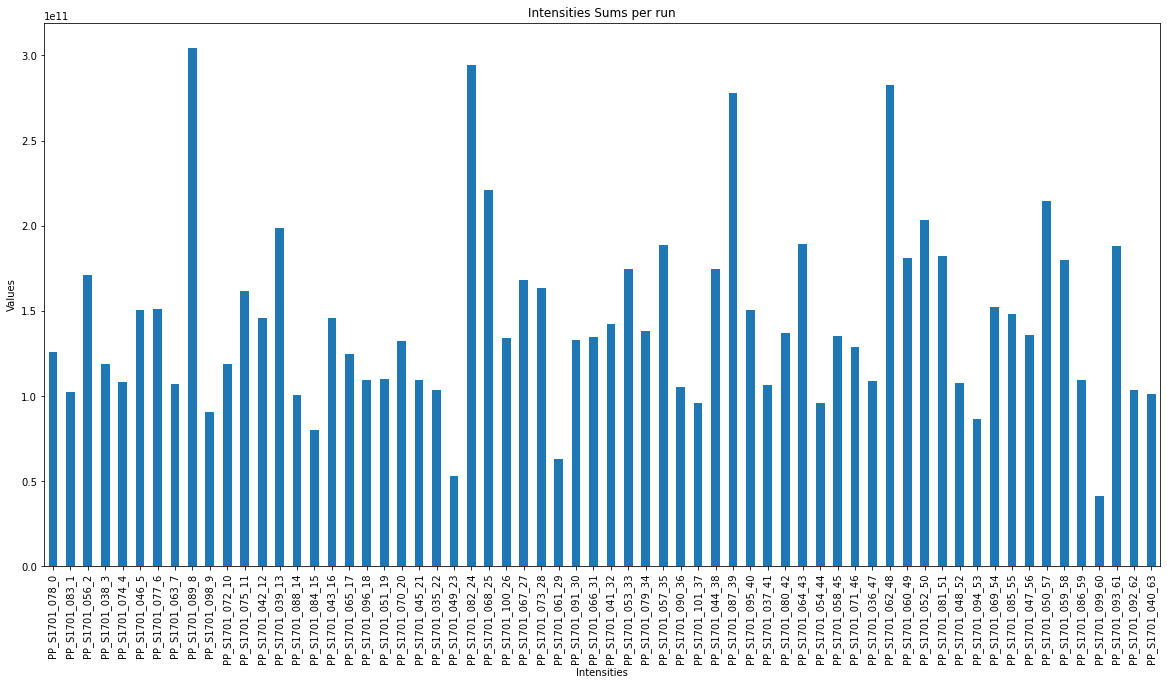

In [9]:
plt.figure(figsize=(20,10))
print (df.sum(axis=0))
df.sum(axis=0).plot.bar()
plt.xlabel("Intensities")
plt.ylabel("Values")
plt.title('Intensities Sums per run')


The Intensities readings are coverted to Logrithmic scale base 10 and remove any NAs or Inf values (replace with 0s)


In [10]:
df_log10 = np.log10(df[['PP_S1701_078_0',
 'PP_S1701_083_1',
 'PP_S1701_056_2',
 'PP_S1701_038_3',
 'PP_S1701_074_4',
 'PP_S1701_046_5',
 'PP_S1701_077_6',
 'PP_S1701_063_7',
 'PP_S1701_089_8',
 'PP_S1701_098_9',
 'PP_S1701_072_10',
 'PP_S1701_075_11',
 'PP_S1701_042_12',
 'PP_S1701_039_13',
 'PP_S1701_088_14',
 'PP_S1701_084_15',
 'PP_S1701_043_16',
 'PP_S1701_065_17',
 'PP_S1701_096_18',
 'PP_S1701_051_19',
 'PP_S1701_070_20',
 'PP_S1701_045_21',
 'PP_S1701_035_22',
 'PP_S1701_049_23',
 'PP_S1701_082_24',
 'PP_S1701_068_25',
 'PP_S1701_100_26',
 'PP_S1701_067_27',
 'PP_S1701_073_28',
 'PP_S1701_061_29',
 'PP_S1701_091_30',
 'PP_S1701_066_31',
 'PP_S1701_041_32',
 'PP_S1701_053_33',
 'PP_S1701_079_34',
 'PP_S1701_057_35',
 'PP_S1701_090_36',
 'PP_S1701_101_37',
 'PP_S1701_044_38',
 'PP_S1701_087_39',
 'PP_S1701_095_40',
 'PP_S1701_037_41',
 'PP_S1701_080_42',
 'PP_S1701_064_43',
 'PP_S1701_054_44',
 'PP_S1701_058_45',
 'PP_S1701_071_46',
 'PP_S1701_036_47',
 'PP_S1701_062_48',
 'PP_S1701_060_49',
 'PP_S1701_052_50',
 'PP_S1701_081_51',
 'PP_S1701_048_52',
 'PP_S1701_094_53',
 'PP_S1701_069_54',
 'PP_S1701_085_55',
 'PP_S1701_047_56',
 'PP_S1701_050_57',
 'PP_S1701_059_58',
 'PP_S1701_086_59',
 'PP_S1701_099_60',
 'PP_S1701_093_61',
 'PP_S1701_092_62',
 'PP_S1701_040_63']])

<ipython-input-10-a9c9c9b93828>:1: RuntimeWarning: divide by zero encountered in log10
  df_log10 = np.log10(df[['PP_S1701_078_0',


In [11]:
df_log10.head()

,PP_S1701_078_0,PP_S1701_083_1,PP_S1701_056_2,PP_S1701_038_3,PP_S1701_074_4,PP_S1701_046_5,PP_S1701_077_6,PP_S1701_063_7,PP_S1701_089_8,PP_S1701_098_9,...,PP_S1701_069_54,PP_S1701_085_55,PP_S1701_047_56,PP_S1701_050_57,PP_S1701_059_58,PP_S1701_086_59,PP_S1701_099_60,PP_S1701_093_61,PP_S1701_092_62,PP_S1701_040_63
0,7.217363,7.304826,7.498192,7.425094,7.343269,7.764767,7.317871,7.460687,7.324186,7.339267,...,7.486055,7.237481,7.674927,7.543790,7.613205,7.198896,7.110593,7.277031,7.204803,7.535081
1,5.718348,5.617814,5.822528,5.552288,5.830143,5.762163,5.905167,5.540677,6.345274,5.722086,...,5.920580,6.131033,5.678662,6.031617,5.883010,5.764391,5.368026,6.168580,5.792068,5.479143
2,5.088933,5.033898,5.188191,4.877328,4.999186,4.943223,5.203926,5.018478,5.361066,-inf,...,2.848868,5.035014,5.162153,5.079655,5.117859,4.923879,4.486077,5.409701,5.088303,4.921627
3,5.852974,6.191448,6.300354,5.664272,6.384649,6.383395,6.531552,6.362049,6.481616,6.219723,...,6.449919,6.594734,6.060048,6.600828,6.301523,6.160042,5.942929,6.440005,6.115081,5.708758
4,6.576587,7.217400,7.294255,6.730071,7.001902,7.489655,7.089905,7.579221,6.321286,6.840210,...,7.634125,7.010465,7.104019,7.503049,7.306339,7.115657,6.804270,6.628583,6.771113,6.798865


In [12]:
np.isinf(df_log10)

,PP_S1701_078_0,PP_S1701_083_1,PP_S1701_056_2,PP_S1701_038_3,PP_S1701_074_4,PP_S1701_046_5,PP_S1701_077_6,PP_S1701_063_7,PP_S1701_089_8,PP_S1701_098_9,...,PP_S1701_069_54,PP_S1701_085_55,PP_S1701_047_56,PP_S1701_050_57,PP_S1701_059_58,PP_S1701_086_59,PP_S1701_099_60,PP_S1701_093_61,PP_S1701_092_62,PP_S1701_040_63
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12650,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12651,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12652,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12653,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


To count how many are nan values and infintity values

In [16]:
print(np.count_nonzero(np.isnan(df_log10)))
print(np.count_nonzero(np.isinf(df_log10)))

10
42932


The NAs and infinite values are taken care by filling it with the number 

In [19]:
df1=np.nan_to_num(df_log10, copy=True, nan=0.0, posinf=None, neginf=None)

In [20]:
print(np.count_nonzero(np.isnan(df1)))
print(np.count_nonzero(np.isinf(df1)))

0
0


In [22]:
df1

array([[7.21736285, 7.30482646, 7.49819197, ..., 7.2770313 , 7.20480346,
        7.53508135],
       [5.71834765, 5.61781378, 5.82252766, ..., 6.16857997, 5.79206812,
        5.47914316],
       [5.08893314, 5.033898  , 5.18819097, ..., 5.40970115, 5.08830268,
        4.92162664],
       ...,
       [5.5768613 , 5.55824598, 5.66226048, ..., 5.88019007, 5.53343267,
        5.44160717],
       [6.93087756, 6.67980628, 6.85962584, ..., 6.84354915, 6.72626696,
        6.78896767],
       [5.25878113, 5.09447071, 5.47542876, ..., 5.58018831, 5.35936389,
        4.9001318 ]])


# Now this should be clean for plotting in different ways

BOXPLOT
know what quartile, IOR (InterQuartileRange Q3-Q1), Q1 (=25% of Total in ordered), Whiskers, Outliers
Outliers:  less than min(=Q1-1.5IQR) and more than max(=Q3+1.5IQR)
inner and outer fence, mild and extreme outliers


In [23]:
df2 = pd.DataFrame(df1,columns =['PP_S1701_078_0',
 'PP_S1701_083_1',
 'PP_S1701_056_2',
 'PP_S1701_038_3',
 'PP_S1701_074_4',
 'PP_S1701_046_5',
 'PP_S1701_077_6',
 'PP_S1701_063_7',
 'PP_S1701_089_8',
 'PP_S1701_098_9',
 'PP_S1701_072_10',
 'PP_S1701_075_11',
 'PP_S1701_042_12',
 'PP_S1701_039_13',
 'PP_S1701_088_14',
 'PP_S1701_084_15',
 'PP_S1701_043_16',
 'PP_S1701_065_17',
 'PP_S1701_096_18',
 'PP_S1701_051_19',
 'PP_S1701_070_20',
 'PP_S1701_045_21',
 'PP_S1701_035_22',
 'PP_S1701_049_23',
 'PP_S1701_082_24',
 'PP_S1701_068_25',
 'PP_S1701_100_26',
 'PP_S1701_067_27',
 'PP_S1701_073_28',
 'PP_S1701_061_29',
 'PP_S1701_091_30',
 'PP_S1701_066_31',
 'PP_S1701_041_32',
 'PP_S1701_053_33',
 'PP_S1701_079_34',
 'PP_S1701_057_35',
 'PP_S1701_090_36',
 'PP_S1701_101_37',
 'PP_S1701_044_38',
 'PP_S1701_087_39',
 'PP_S1701_095_40',
 'PP_S1701_037_41',
 'PP_S1701_080_42',
 'PP_S1701_064_43',
 'PP_S1701_054_44',
 'PP_S1701_058_45',
 'PP_S1701_071_46',
 'PP_S1701_036_47',
 'PP_S1701_062_48',
 'PP_S1701_060_49',
 'PP_S1701_052_50',
 'PP_S1701_081_51',
 'PP_S1701_048_52',
 'PP_S1701_094_53',
 'PP_S1701_069_54',
 'PP_S1701_085_55',
 'PP_S1701_047_56',
 'PP_S1701_050_57',
 'PP_S1701_059_58',
 'PP_S1701_086_59',
 'PP_S1701_099_60',
 'PP_S1701_093_61',
 'PP_S1701_092_62',
 'PP_S1701_040_63'])
    

In [24]:
df2.head()

,PP_S1701_078_0,PP_S1701_083_1,PP_S1701_056_2,PP_S1701_038_3,PP_S1701_074_4,PP_S1701_046_5,PP_S1701_077_6,PP_S1701_063_7,PP_S1701_089_8,PP_S1701_098_9,...,PP_S1701_069_54,PP_S1701_085_55,PP_S1701_047_56,PP_S1701_050_57,PP_S1701_059_58,PP_S1701_086_59,PP_S1701_099_60,PP_S1701_093_61,PP_S1701_092_62,PP_S1701_040_63
0,7.217363,7.304826,7.498192,7.425094,7.343269,7.764767,7.317871,7.460687,7.324186,7.339267e+00,...,7.486055,7.237481,7.674927,7.543790,7.613205,7.198896,7.110593,7.277031,7.204803,7.535081
1,5.718348,5.617814,5.822528,5.552288,5.830143,5.762163,5.905167,5.540677,6.345274,5.722086e+00,...,5.920580,6.131033,5.678662,6.031617,5.883010,5.764391,5.368026,6.168580,5.792068,5.479143
2,5.088933,5.033898,5.188191,4.877328,4.999186,4.943223,5.203926,5.018478,5.361066,-1.797693e+308,...,2.848868,5.035014,5.162153,5.079655,5.117859,4.923879,4.486077,5.409701,5.088303,4.921627
3,5.852974,6.191448,6.300354,5.664272,6.384649,6.383395,6.531552,6.362049,6.481616,6.219723e+00,...,6.449919,6.594734,6.060048,6.600828,6.301523,6.160042,5.942929,6.440005,6.115081,5.708758
4,6.576587,7.217400,7.294255,6.730071,7.001902,7.489655,7.089905,7.579221,6.321286,6.840210e+00,...,7.634125,7.010465,7.104019,7.503049,7.306339,7.115657,6.804270,6.628583,6.771113,6.798865


<AxesSubplot:title={'center':'BOX PLOT'}>

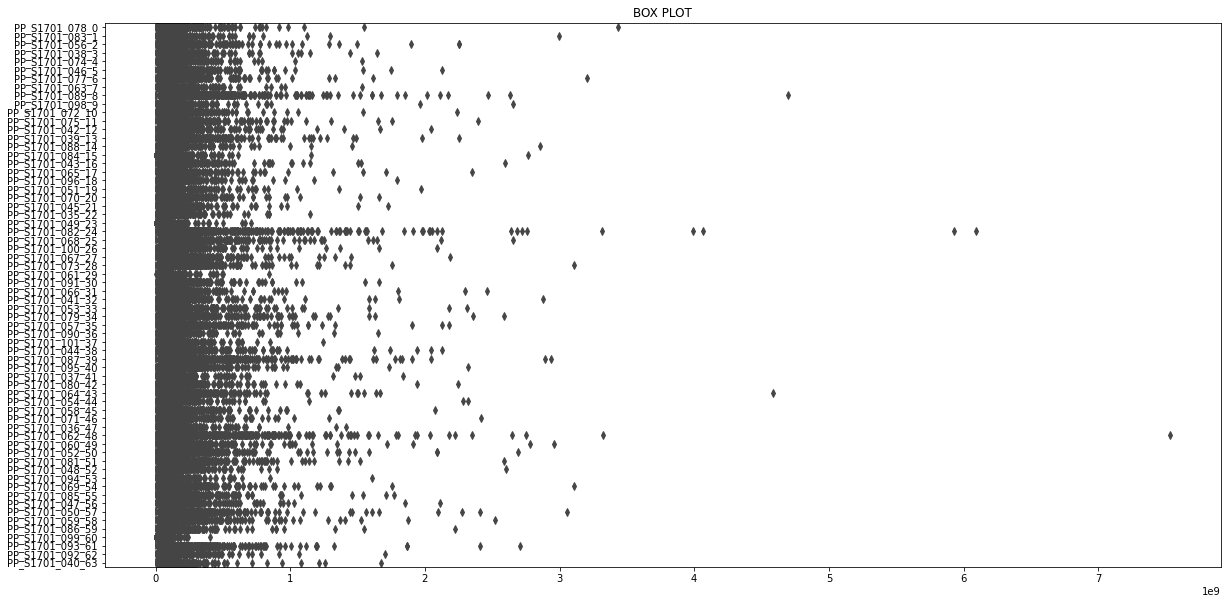

In [25]:
plt.figure(figsize=(20,10))
# Set title with matplotlib
plt.title('BOX PLOT')
sns.boxplot(data=df[['PP_S1701_078_0',
 'PP_S1701_083_1',
 'PP_S1701_056_2',
 'PP_S1701_038_3',
 'PP_S1701_074_4',
 'PP_S1701_046_5',
 'PP_S1701_077_6',
 'PP_S1701_063_7',
 'PP_S1701_089_8',
 'PP_S1701_098_9',
 'PP_S1701_072_10',
 'PP_S1701_075_11',
 'PP_S1701_042_12',
 'PP_S1701_039_13',
 'PP_S1701_088_14',
 'PP_S1701_084_15',
 'PP_S1701_043_16',
 'PP_S1701_065_17',
 'PP_S1701_096_18',
 'PP_S1701_051_19',
 'PP_S1701_070_20',
 'PP_S1701_045_21',
 'PP_S1701_035_22',
 'PP_S1701_049_23',
 'PP_S1701_082_24',
 'PP_S1701_068_25',
 'PP_S1701_100_26',
 'PP_S1701_067_27',
 'PP_S1701_073_28',
 'PP_S1701_061_29',
 'PP_S1701_091_30',
 'PP_S1701_066_31',
 'PP_S1701_041_32',
 'PP_S1701_053_33',
 'PP_S1701_079_34',
 'PP_S1701_057_35',
 'PP_S1701_090_36',
 'PP_S1701_101_37',
 'PP_S1701_044_38',
 'PP_S1701_087_39',
 'PP_S1701_095_40',
 'PP_S1701_037_41',
 'PP_S1701_080_42',
 'PP_S1701_064_43',
 'PP_S1701_054_44',
 'PP_S1701_058_45',
 'PP_S1701_071_46',
 'PP_S1701_036_47',
 'PP_S1701_062_48',
 'PP_S1701_060_49',
 'PP_S1701_052_50',
 'PP_S1701_081_51',
 'PP_S1701_048_52',
 'PP_S1701_094_53',
 'PP_S1701_069_54',
 'PP_S1701_085_55',
 'PP_S1701_047_56',
 'PP_S1701_050_57',
 'PP_S1701_059_58',
 'PP_S1701_086_59',
 'PP_S1701_099_60',
 'PP_S1701_093_61',
 'PP_S1701_092_62',
 'PP_S1701_040_63']],orient="h")


In [26]:
df2_i = pd.DataFrame(df1)

In [27]:
df2_i.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,7.217363,7.304826,7.498192,7.425094,7.343269,7.764767,7.317871,7.460687,7.324186,7.339267e+00,...,7.486055,7.237481,7.674927,7.543790,7.613205,7.198896,7.110593,7.277031,7.204803,7.535081
1,5.718348,5.617814,5.822528,5.552288,5.830143,5.762163,5.905167,5.540677,6.345274,5.722086e+00,...,5.920580,6.131033,5.678662,6.031617,5.883010,5.764391,5.368026,6.168580,5.792068,5.479143
2,5.088933,5.033898,5.188191,4.877328,4.999186,4.943223,5.203926,5.018478,5.361066,-1.797693e+308,...,2.848868,5.035014,5.162153,5.079655,5.117859,4.923879,4.486077,5.409701,5.088303,4.921627
3,5.852974,6.191448,6.300354,5.664272,6.384649,6.383395,6.531552,6.362049,6.481616,6.219723e+00,...,6.449919,6.594734,6.060048,6.600828,6.301523,6.160042,5.942929,6.440005,6.115081,5.708758
4,6.576587,7.217400,7.294255,6.730071,7.001902,7.489655,7.089905,7.579221,6.321286,6.840210e+00,...,7.634125,7.010465,7.104019,7.503049,7.306339,7.115657,6.804270,6.628583,6.771113,6.798865


In [31]:
df2_i.shape

(12655, 64)

In [32]:
from sklearn import preprocessing
d = preprocessing.normalize(df2_i)
scaled_df = pd.DataFrame(d)
scaled_df.head()

/Users/kalaivanikarthik/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.775594,0.076441,0.079227,0.07555,0.07933,0.078405,0.080351,0.075392,0.08634,0.07786,...,0.080561,0.083424,0.077269,0.082072,0.08005,0.078436,0.073042,0.083935,0.078812,0.074554
2,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,-0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


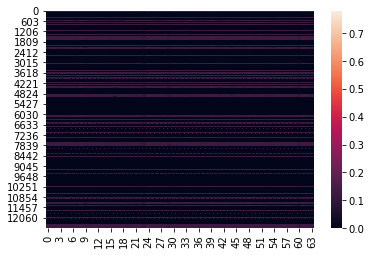

In [33]:
import seaborn as sns
heat_map = sns.heatmap(scaled_df)

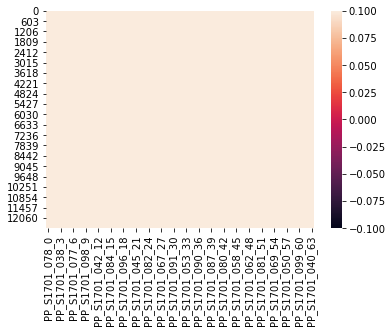

In [34]:
import seaborn as sns
heat_map = sns.heatmap(df_log10)